# Homework 04
## Ekrem Yiğiter 59721
### November 30, 2020

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Importing Data

In [3]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")

# get x and y values
x_train = data_set[1:101,0]
y_train = data_set[1:101,1].astype(int)
x_test = data_set[101:134,0]
y_test = data_set[101:134,1].astype(int)

# get number of classes and number of samples
K = np.max(y_train)
N = data_set.shape[0]

## Drawing Parameters

In [4]:
point_colors = np.array(["blue", "red"])
minimum_value = np.min(data_set[1:134,0])-3
maximum_value = np.max(data_set[1:134,0])+3
data_interval = np.linspace(minimum_value, maximum_value, 13301)
maximum_value

60.6

## Regressogram

$$\widehat{p}(x) = \dfrac{\#\{x_{i} \textrm{ is in the same bin as } x\}}{Nh}$$

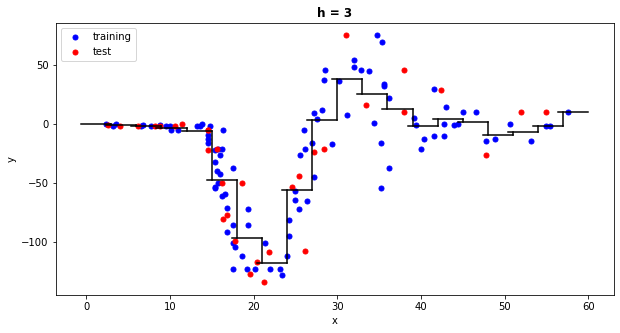

In [5]:
bin_width = 3
left_borders = np.arange(minimum_value, maximum_value - bin_width, bin_width)
right_borders = np.arange(0 + bin_width, maximum_value, bin_width)
p_hat_reg = np.asarray([np.sum(((left_borders[i] < x_train) & (x_train <= right_borders[i])) * y_train)\
/np.sum((left_borders[i] < x_train) & (x_train <= right_borders[i])) for i in range(len(left_borders))])

plt.figure(figsize = (10, 5))
plt.plot(x_train, y_train, "b.", markersize = 10, label = 'training')
plt.plot(x_test, y_test, "r.", markersize = 10, label = 'test')
plt.legend(loc='upper left')
plt.title('h = 3', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat_reg[b], p_hat_reg[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat_reg[b], p_hat_reg[b +1]], "k-")    
plt.show()

In [6]:
left_borders.shape

(20,)

## RMSE for Regressogram

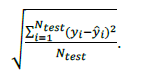

In [16]:
reg_pred = np.zeros(20)
for i in range(20):
    reg_pred[i] = y_test[i] - p_hat_reg[i]
rmse_reg = np.sqrt(np.sum((reg_pred)**2)/33)

print('Regressogram => RMSE is ' + str(rmse_reg) + '  when h is 3')

Regressogram => RMSE is 36.611035534888266  when h is 3


## Running Mean Smoother

<ipython-input-8-a8d72294610b>:2: RuntimeWarning: invalid value encountered in long_scalars
  p_hat_run = np.asarray([np.sum((((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) * y_train) \


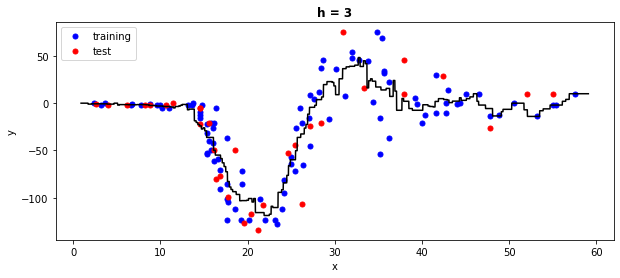

In [8]:
bin_width = 3
p_hat_run = np.asarray([np.sum((((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) * y_train) \
/ np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) for x in data_interval])

plt.figure(figsize = (10, 4))
plt.plot(x_train, y_train, "b.", markersize = 10, label = 'training')
plt.plot(x_test, y_test, "r.", markersize = 10, label = 'test')
plt.legend(loc='upper left')
plt.title('h = 3', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data_interval, p_hat_run, "k-")
plt.show()

## RMSE for Running Mean Smoother

In [9]:
run_pred = np.asarray([np.sum((((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) * y_train) \
/ np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) for x in x_test])
rmse_run = np.sqrt(sum((y_test - run_pred)**2)/33)
print('Running Mean Smoother => RMSE is ' + str(rmse_run) + '  when h is 3')

Running Mean Smoother => RMSE is 23.719660151778942  when h is 3


## Kernel Smoother

\begin{align*}
\widehat{p}(x) &= \dfrac{1}{Nh} \sum \limits_{i = 1}^{N} K\left(\dfrac{x - x_{i}}{h}\right) \\
K(u) &= \dfrac{1}{\sqrt{2\pi}} \exp\left(-\dfrac{u^2}{2}\right)
\end{align*}

<ipython-input-10-016855c27be1>:2: RuntimeWarning: invalid value encountered in double_scalars
  p_hat_kernel = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train)\


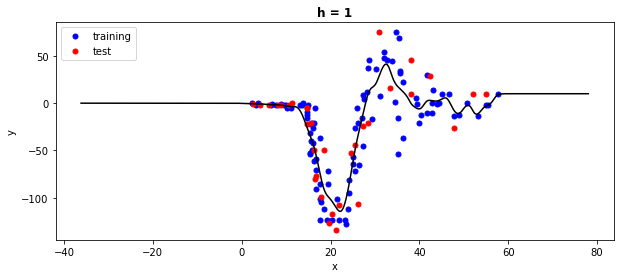

In [10]:
bin_width = 1
p_hat_kernel = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train)\
/ np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in data_interval])

plt.figure(figsize = (10, 4))
plt.plot(x_train, y_train, "b.", markersize = 10, label = 'training')
plt.plot(x_test, y_test, "r.", markersize = 10, label = 'test')
plt.legend(loc='upper left')
plt.title('h = 1', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data_interval, p_hat_kernel, "k-")
plt.show()

## RMSE for Kernel Smoother

In [11]:
kernel_pred = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train)\
/ np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in x_test])

rmse_kernel = np.sqrt(sum((y_test - kernel_pred)**2)/33)
print('Kernel Smoother => RMSE is ' + str(rmse_kernel) + '  when h is 1')

Kernel Smoother => RMSE is 24.065852572908373  when h is 1
